# **Clasificación con máquinas de vectores de soporte y random forest**
---

## **Objetivos**

Mediante este proyecto se pretende crear modelos basados en máquinas de vector de soporte y random forest. Se busca comprender con un problema real las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine (SVM) a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.

## **Descripción del proyecto**

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

**El objetivo de la clasificación será detectar el tipo de suelo.**

---

## **Análisis descriptivo de los datos (EDA)**

In [2]:
#!pip3 install -U ucimlrepo     # Instala/actualiza la librería 'ucimlrepo' para acceder a datasets del UCI Machine Learning Repository

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

from ucimlrepo import fetch_ucirepo  # Se importa la función para descargar datasets del UCI Machine Learning Repository

In [4]:
# En lugar de cargar el dataset desde local, lo descargaré de su repositorio.
covertype = fetch_ucirepo(id=31) # Se descarga el dataset "Covertype" desde el repositorio de UCI (ID: 31)
df = covertype.data.original     # Obtiene el dataframe original del dataset

# Se separan las características (X) y las etiquetas de salida (Y)
X = covertype.data.features      # Variables independientes, características
Y = covertype.data.targets       # Variable dependiente, clase objetivo (Cover_Type)

print(Y)
print(covertype.metadata)        # Muestro la información del dataset

        Cover_Type
0                5
1                5
2                2
3                2
4                5
...            ...
581007           3
581008           3
581009           3
581010           3
581011           3

[581012 rows x 1 columns]
{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': 

A continuación, buscaré responder a algunas preguntas típicas que uno debe hacerse al realizar un EDA para entender la estructura y calidad del dataset.

- **¿Cuántas instancias de datos tiene el dataset?**
- **¿Cuáles son las características (features) y su tipo de datos?**
- **¿Cuántas variables continuas hay en el dataset?**
- **¿Cuántas variables categóricas hay en el dataset?**

In [5]:
# ¿Cuántas instancias de datos tiene el dataset?
num_instances = df.shape[0]
print(f'El dataset tiene {num_instances} instancias.')


# ¿Cuáles son las características (features) y su tipo de datos?
dtypes = df.dtypes
print("\nCaracterísticas y tipos de datos:")
print(dtypes)


El dataset tiene 581012 instancias.

Características y tipos de datos:
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_

El dataset muestra que hay 581012 instancias, que coincide con el número de instancias que aparece en la web de descarga del dataset.

In [6]:
# ¿Cuántas variables continuas hay en el dataset?
unique_counts = df.nunique()
variables_continuas = unique_counts[unique_counts > 7]
num_variables_continuas = len(variables_continuas)
print(f'El dataset tiene {num_variables_continuas} variables continuas.')


# ¿Cuántas variables categóricas hay en el dataset?
categorica = df.apply(lambda col: col.nunique() == 2)  # Dado que en este dataset las categóricas son binarias.
num_variables_categoricas = categorica.sum()
print(f'El dataset tiene {num_variables_categoricas} variables categóricas + 1 (Cover_Type).')

categorica_names = categorica[categorica].index
categorias_categoricas = {col: df[col].unique().tolist() for col in categorica_names}
print('*********************************')
print('Categorías de las variables categóricas:')
for col, categorias in categorias_categoricas.items():
    print(f'{col}: {categorias}')

El dataset tiene 10 variables continuas.
El dataset tiene 44 variables categóricas + 1 (Cover_Type).
*********************************
Categorías de las variables categóricas:
Wilderness_Area1: [1, 0]
Wilderness_Area2: [0, 1]
Wilderness_Area3: [0, 1]
Wilderness_Area4: [0, 1]
Soil_Type1: [0, 1]
Soil_Type2: [0, 1]
Soil_Type3: [0, 1]
Soil_Type4: [0, 1]
Soil_Type5: [0, 1]
Soil_Type6: [0, 1]
Soil_Type7: [0, 1]
Soil_Type8: [0, 1]
Soil_Type9: [0, 1]
Soil_Type10: [0, 1]
Soil_Type11: [0, 1]
Soil_Type12: [0, 1]
Soil_Type13: [0, 1]
Soil_Type14: [0, 1]
Soil_Type15: [0, 1]
Soil_Type16: [0, 1]
Soil_Type17: [0, 1]
Soil_Type18: [0, 1]
Soil_Type19: [0, 1]
Soil_Type20: [0, 1]
Soil_Type21: [0, 1]
Soil_Type22: [0, 1]
Soil_Type23: [0, 1]
Soil_Type24: [0, 1]
Soil_Type25: [0, 1]
Soil_Type26: [0, 1]
Soil_Type27: [0, 1]
Soil_Type28: [0, 1]
Soil_Type29: [1, 0]
Soil_Type30: [0, 1]
Soil_Type31: [0, 1]
Soil_Type32: [0, 1]
Soil_Type33: [0, 1]
Soil_Type34: [0, 1]
Soil_Type35: [0, 1]
Soil_Type36: [0, 1]
Soil_Type37: 

Tenemos 10 variables continuas, que corresponden desde la columna 0 hasta la 9.

Las 45 variables restantes son categóricas, donde se incluye también a la variable objetivo (Cover_Type), ya que esta representa diferentes tipos de cobertura forestal tomando valores enteros del 1 al 7.


- **¿Cómo es la distribución en el dataset? ¿Está el dataset balanceado?**
- **¿Cómo es la distribución de cada variable numérica?**
- **¿Hay outliers en el dataset?**

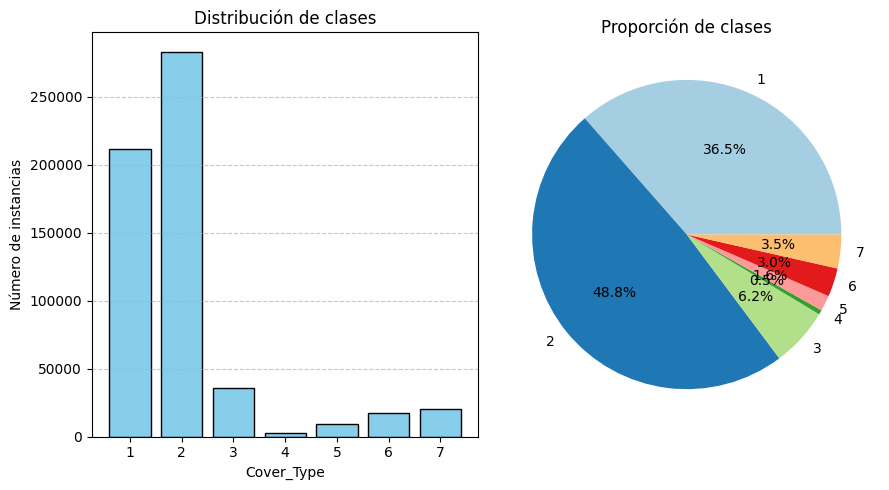

In [ ]:
# ¿Cómo es la distribución en el dataset? ¿Está el dataset balanceado?

class_distribution = df["Cover_Type"].value_counts().sort_index() # Cuenta la cantidad de instancias por cada clase en la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(9, 5))                    # Creo una figura con dos subgráficos

# Gráfico de barras
axes[0].bar(class_distribution.index, class_distribution.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Cover_Type")
axes[0].set_ylabel("Número de instancias")
axes[0].set_title("Distribución de clases")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(class_distribution.index)

# Gráfico de tarta
axes[1].pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[1].set_title("Proporción de clases")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se puede ver que claramente el dataset está desbalanceado, con una gran diferencia en la cantidad de instancias por clase. Siendo las clases 1 (36.5%) y 2 (48.8%) las más representadas con alrededor de un 85% de los datos, mientras que la clase 4 es la menos representadas con apenas un 0.47%.

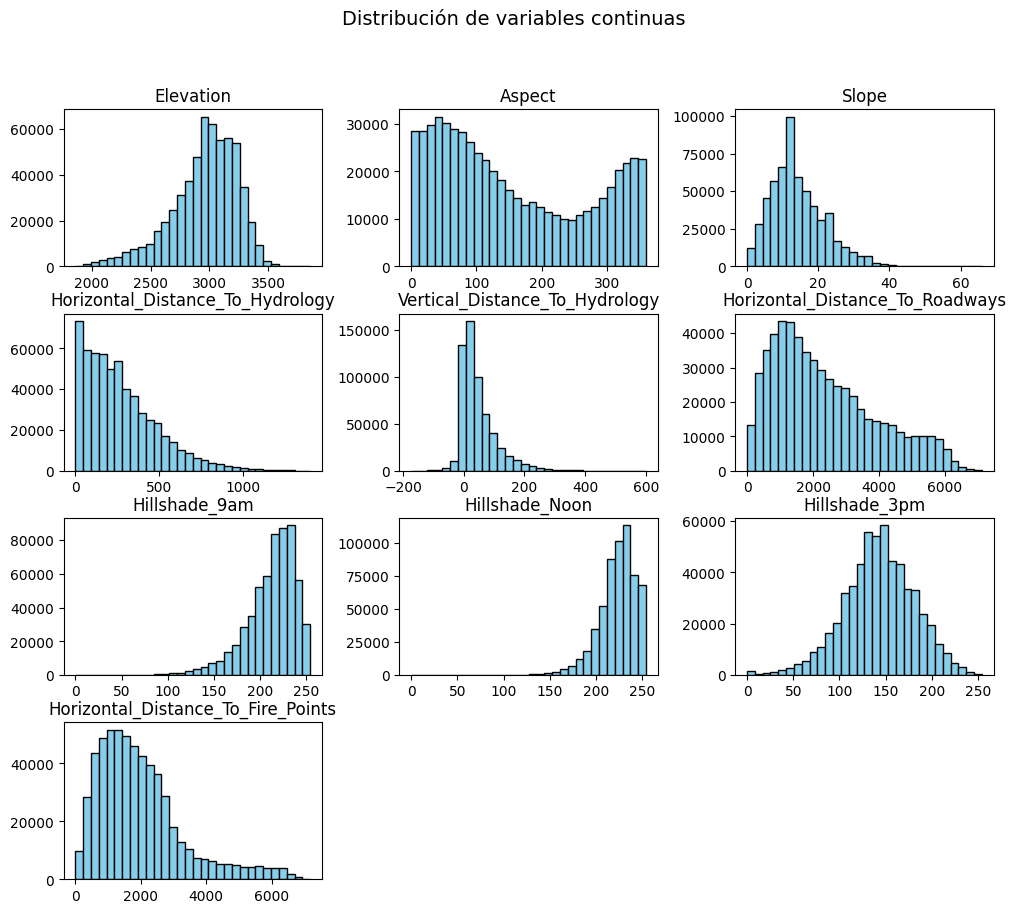

In [11]:
# ¿Cómo es la distribución de cada variable numérica?

df.iloc[:, :10].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black', grid=False) # Selecciono las 10 columnas primeras (variables continuas)
plt.suptitle("Distribución de variables continuas", fontsize=14)
plt.show()

Según la variable en que nos fijemos encontramos distinto sesgo en las distribuciones y significados de las mismas. Por mencionar algunas:

- Elevation: Se puede apreciar que la mayoría de instancias se encuentran en una elevación concreta, pero hay un buen número de valores aún más altos.
- Horizontal_Distance_To_Hydrology: Muestra que la mayoría de las ubicaciones están relativamente cerca de fuentes de agua.
- Hillshade: Estas tres variables muestran distribuciones con picos bien definidos, reflejando cómo la luz solar impacta el terreno en diferentes momentos del día.


Número de outliers por variable continua:
Elevation                              8528
Aspect                                    0
Slope                                  7247
Horizontal_Distance_To_Hydrology       8448
Vertical_Distance_To_Hydrology        22722
Horizontal_Distance_To_Roadways           0
Hillshade_9am                         10837
Hillshade_Noon                         9925
Hillshade_3pm                          3514
Horizontal_Distance_To_Fire_Points    22474
dtype: int64

Porcentaje de outliers por variable continua respeco al total del dataset:
Elevation                             1.467784
Aspect                                0.000000
Slope                                 1.247306
Horizontal_Distance_To_Hydrology      1.454015
Vertical_Distance_To_Hydrology        3.910763
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         1.865194
Hillshade_Noon                        1.708226
Hillshade_3pm                         0.604807
Horiz

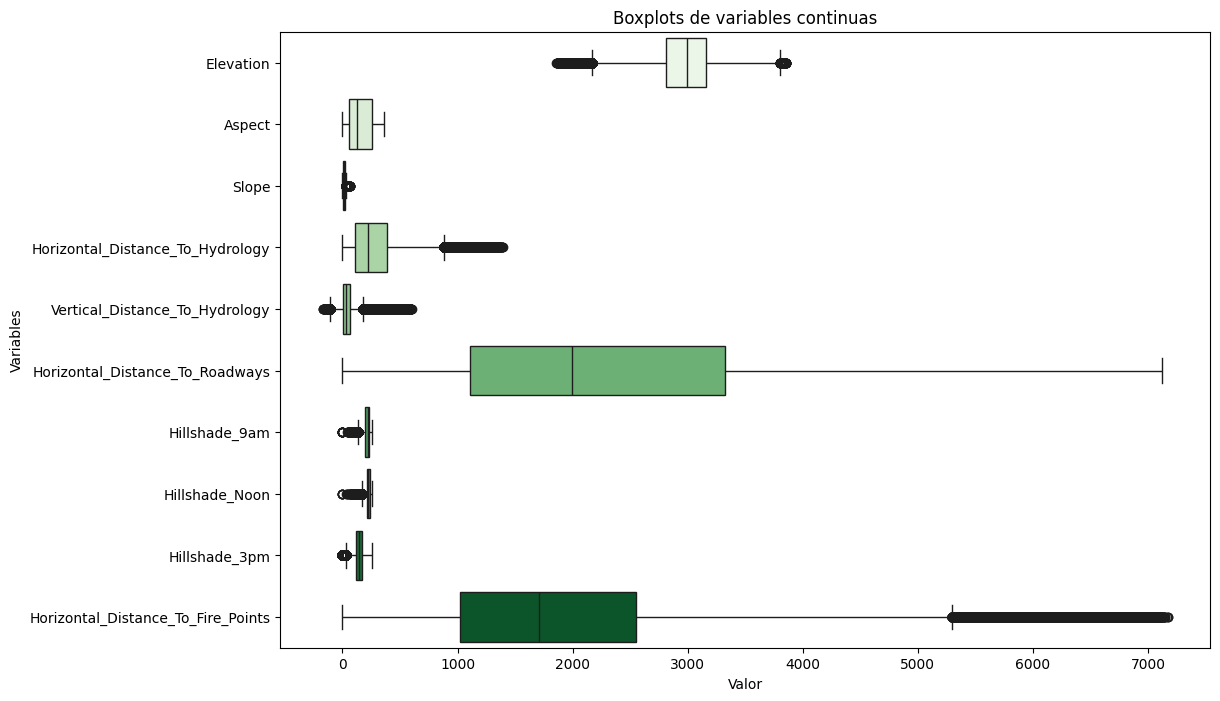

In [15]:
# ¿Hay outliers en el dataset?

# Calcular los valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = df.iloc[:, :10].quantile(0.25)            # Calculo el primer cuartil
Q3 = df.iloc[:, :10].quantile(0.75)            # Calculo el tercer cuartil
IQR = Q3 - Q1                                  # Calculo el rango intercuartílico

# Un valor se considerará outlier si es menor que Q1 - 1.8 * IQR o mayor que Q3 + 1.8 * IQR
outliers = ((df.iloc[:, :10] < (Q1 - 1.8 * IQR)) | (df.iloc[:, :10] > (Q3 + 1.8 * IQR))).sum()
outlier_percentages = (outliers / num_instances) * 100

print("\nNúmero de outliers por variable continua:")
print(outliers)
print("\nPorcentaje de outliers por variable continua respeco al total del dataset:")
print(outlier_percentages)

# Creo boxplots para identificar posibles outliers en las variables continuas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :10], orient="h", palette="Greens", whis=1.8)
plt.title("Boxplots de variables continuas")
plt.xlabel("Valor")
plt.ylabel("Variables")
plt.show()


Aunque ya era apreciable cuando representé las distribuciones de las variables, ahora es aún más visible con los boxplots en los que se observan un buen número de valores fuera de los bigotes que delimitan los valores permitidos. He decidido usar un multiplicador de 1.8 dado que es el que consigue un mejor equilibrio para distinguir entre un valor útil y un valor atípico.

- **¿Existen valores nulos o duplicados en el dataset?**
- **¿Existe alguna variable altamente correlacionada con la variable de clase?**

In [16]:
# ¿Existen valores nulos o duplicados en el dataset?

valores_nulos = df.isnull().sum()        # Método isnull() para detectar valores nulos y luego sum() para contar cuántos hay por columna
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])  # Solo muestra columnas con valores nulos


duplicados = df.duplicated().sum()       # Método duplicated() para identificar filas duplicadas y sum() para contarlas
print(f"\nNúmero de registros duplicados: {duplicados}")



Valores nulos por columna:
Series([], dtype: int64)

Número de registros duplicados: 0


No hay valores nulos ni duplicados, tal y como aparece en la web de descarga del dataset.

Correlaciones de las variables continuas con la variable objetivo:
Elevation                            -0.269554
Aspect                                0.017080
Slope                                 0.148285
Horizontal_Distance_To_Hydrology     -0.020317
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Cover_Type                            1.000000
Name: Cover_Type, dtype: float64


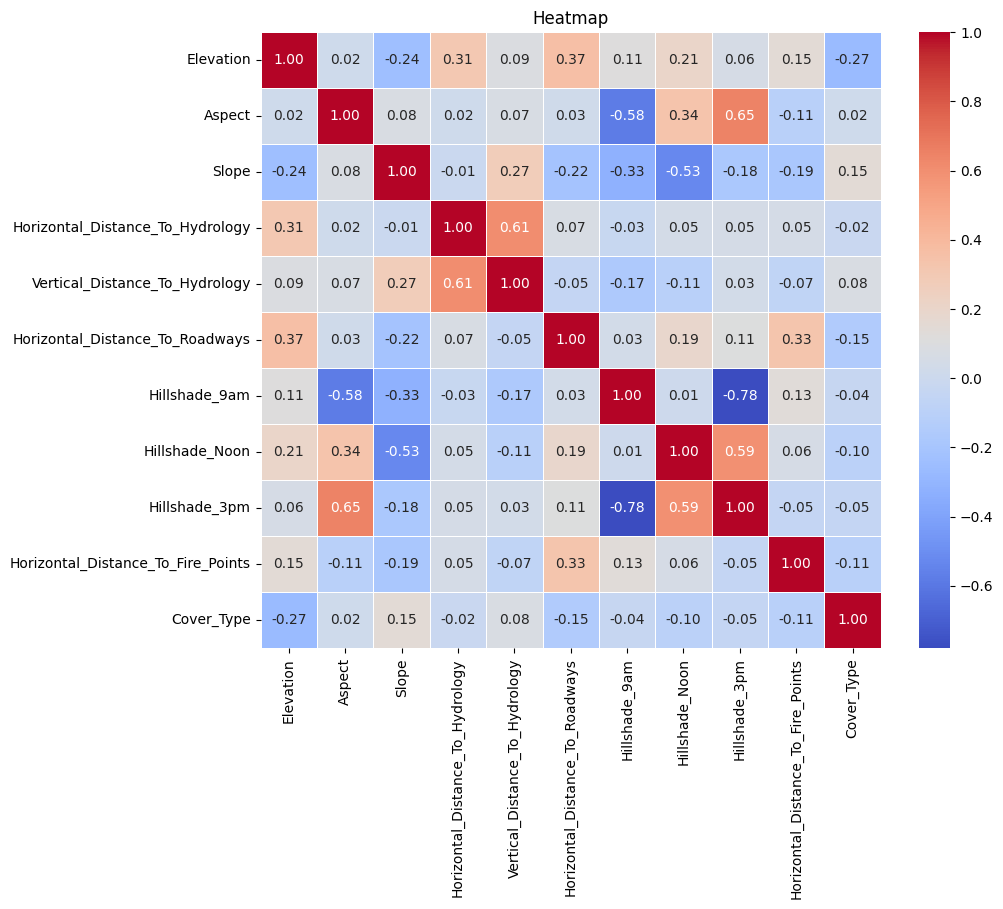

In [17]:
# ¿Existe alguna variable altamente correlacionada con la variable objetivo?

# Excluyo las variables categóricas dado que no tiene sentido calcular la correlación con ellas.
# La correlación de manera resumida indica con cuánta seguridad sabes que una variable aumenta cuando aumenta la otra. 
# Esto, para valores que no tienen esa relación de cantidad entre sí no tiene sentido.

continuous_data = pd.concat([df.iloc[:, :10], Y], axis=1)  # Selecciono solo las variables continuas y la variable objetivo
correlation_matrix = continuous_data.corr()                # Calculo la matriz de correlación

# Muestro las correlaciones de todas las variables continuas con la variable objetivo
correlation_with_class = correlation_matrix['Cover_Type']
print("Correlaciones de las variables continuas con la variable objetivo:")
print(correlation_with_class)

# Creo un heatmap para visualizar la correlación
plt.figure(figsize=(10, 8))

# Heatmap de correlación
sns.heatmap(
    continuous_data.corr(),
    annot=True,       # Para mostrar los valores de correlación en el gráfico
    cmap='coolwarm',  # Esquema de colores
    fmt=".2f",        # Formato de los valores
    linewidths=0.5    # Separación entre las celdas
)
plt.title("Heatmap")
plt.show()


Podemos ver que no existen fuertes correlaciones con la variable de clase. Las variables con mayor relación son:

- Elevation: Correlación de -0.27 (relación negativa moderada), podría ser relevante para la predicción.
- Slope: Correlación de 0.15 (relación positiva débil).
- Horizontal_Distance_To_Roadways: Correlación de -0.15 (relación negativa débil).

Slope y Horizontal_Distance_To_Roadways tienen relaciones más débiles, pero podrían tener impacto en combinación con otras variables.

## **Clasificación**

### **Random Forest**

Se va a realizar la clasificación utilizando Random Forest (RF), para ello hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

El algoritmo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:

- **n_estimators**:       Representa el número de árboles en el bosque. Cuanto más mayor sea mejor será el rendimiento del modelo generalmente, pero también incrementa el tiempo de entrenamiento.
- **criterion**:          Define la función para medir la calidad de una división. Las opciones comunes son "gini" para el índice de Gini y "entropy" para la ganancia de información.
- **max_depth**:          Profundidad máxima de los árboles. Si se establece en None, los nodos se expanden hasta que todas las hojas contienen menos de min_samples_split muestras.
- **min_samples_split**:  Número mínimo de muestras necesarias para dividir un nodo. Un valor más alto puede llevar a árboles menos profundos y generalizar mejor.
- **min_samples_leaf**:   Número mínimo de muestras necesarias en una hoja. Esto ayuda a prevenir la creación de hojas con muy pocas muestras.
- **max_features**:       Número máximo de características que se consideran para encontrar la mejor división. Se indica None para considerar todas las características.

Además de estos hiperparámetros típicos, existe el hiperparámetro "**class_weight**" que ajusta los pesos asociados con las clases para manejar datasets desequilibrados. Se puede especificar el peso para cada clase mediante un diccionario o usar la opción "balanced" que ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de clase.

Es útil para mejorar el rendimiento del modelo en datasets donde hay clases que están subrepresentadas. Al ajustar los pesos, se puede ayudar  al modelo a prestar más atención a las clases minoritarias y mejoras métricas como el recall y la precisión para esas clases.



Otro detalle a tener en cuenta en el algoritmo de RF es que **no es necesario realizar una normalización de los datos**. Esto se debe a que los árboles de decisión (que son la base de los Random Forest) dividen los datos en función de umbrales en las características individuales y no dependen de la escala de las características.